# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [151]:
#Import all the necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [63]:
diabetes_df = pd.read_csv('pima-indians-diabetes.csv')
diabetes_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [64]:
diabetes_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [65]:
diabetes_df.dtypes #No Object data types observed

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [66]:
diabetes_df.shape # 768 rows and 9 columns

(768, 9)

In [67]:
diabetes_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
index_plasma = pd.Series(diabetes_df[diabetes_df['Plas'] == 0].index)# Plasma with 0 values
print('Plas indexes ', index_plasma)
index_pres = pd.Series(diabetes_df[diabetes_df['Pres'] == 0].index)# Pres with 0 values
print('Pres indexes ', index_pres)
index_skin = pd.Series(diabetes_df[diabetes_df['skin'] == 0].index)# skin with 0 values
print('skin indexes ', index_pres)

Plas indexes  0     75
1    182
2    342
3    349
4    502
dtype: int64
Pres indexes  0       7
1      15
2      49
3      60
4      78
5      81
6     172
7     193
8     222
9     261
10    266
11    269
12    300
13    332
14    336
15    347
16    357
17    426
18    430
19    435
20    453
21    468
22    484
23    494
24    522
25    533
26    535
27    589
28    601
29    604
30    619
31    643
32    697
33    703
34    706
dtype: int64
skin indexes  0       7
1      15
2      49
3      60
4      78
5      81
6     172
7     193
8     222
9     261
10    266
11    269
12    300
13    332
14    336
15    347
16    357
17    426
18    430
19    435
20    453
21    468
22    484
23    494
24    522
25    533
26    535
27    589
28    601
29    604
30    619
31    643
32    697
33    703
34    706
dtype: int64


In [69]:
'''Function to iterate the three columns and replace the missing values 0 with median'''
def replace_missing(series_indexes, col_name, median):
    for i in series_indexes:
        diabetes_df.loc[i,col_name] = median;
        


In [70]:
replace_missing(index_plasma, 'Plas', diabetes_df.Plas.median())
replace_missing(index_pres, 'Pres', diabetes_df.Pres.median())
replace_missing(index_skin, 'skin', diabetes_df.skin.median())
print(diabetes_df.loc[75,'Plas'])
print(diabetes_df.loc[7,'Pres'])
print(diabetes_df.loc[15,'skin'])
# Replaced all the zeros with medians in the three columns

117.0
72.0
23.0


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [0]:
#Just did above this questions. Plasma , Pres and skin now has medians in them.
#As seen in the below describe the min  values for thiese columns are non zero now.

# Q5 Print the descriptive statistics of each & every column using describe() function

In [71]:
diabetes_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

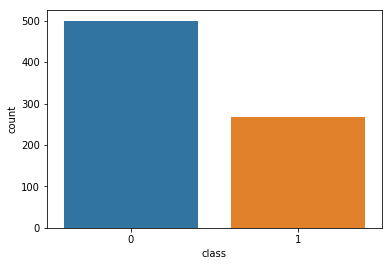

In [76]:
sns.countplot(diabetes_df['class']);

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [79]:
diabetes_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.331709,0.235035,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.045769,0.234336,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.244250,0.504307,0.142977,0.054514,0.189065
test,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.235035,0.234336,0.504307,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.130548,0.292695,0.173844,0.238356,1.000000


'Observations\nPreg, '

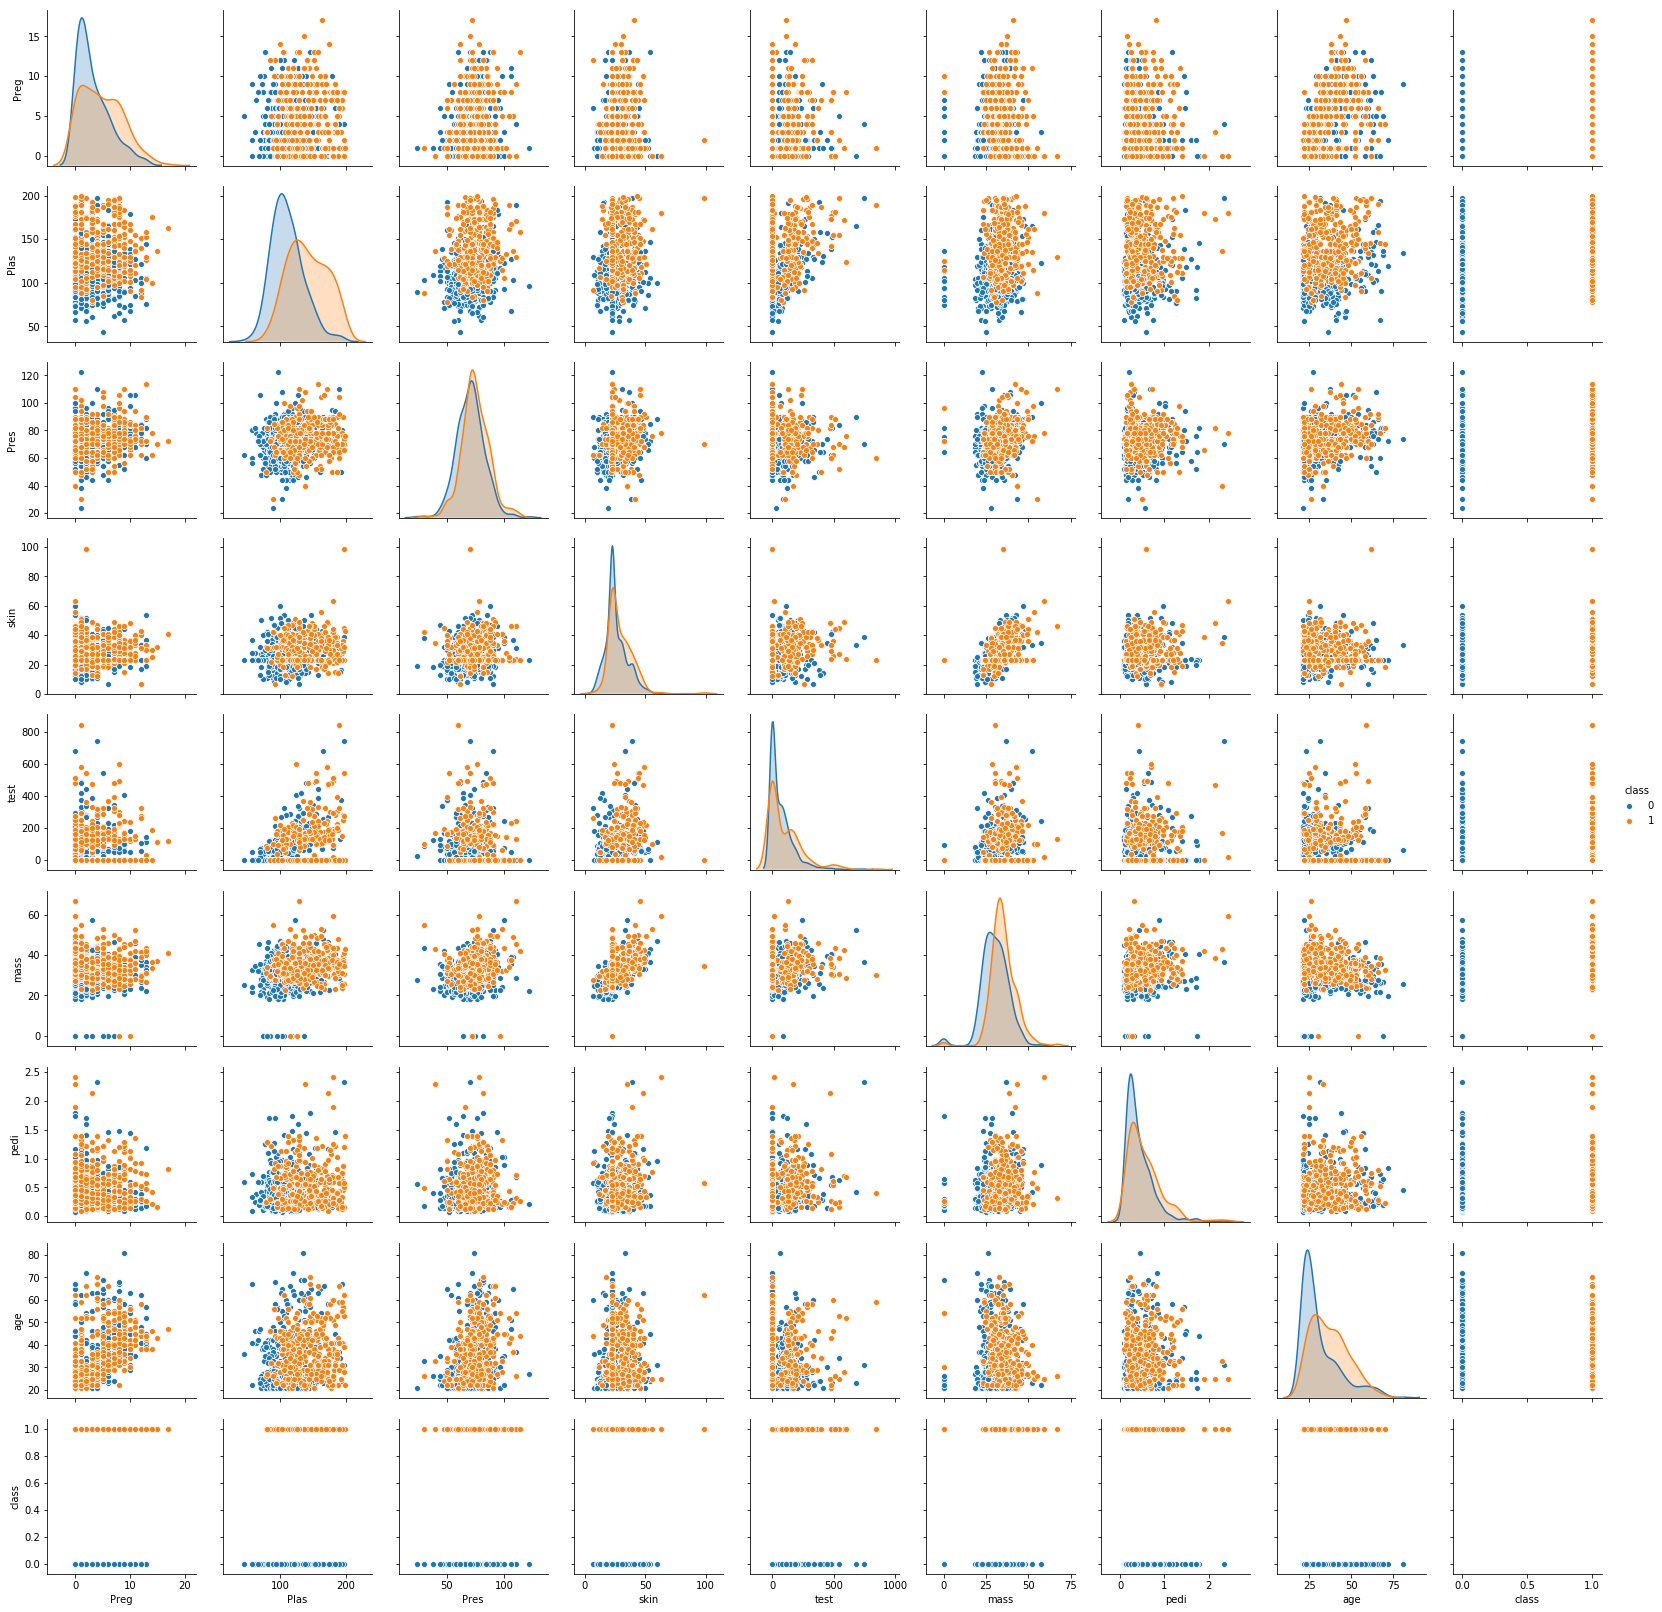

In [149]:
sns.pairplot(diabetes_df,  diag_kind='kde', hue='class');
'''Observations
Preg, '''

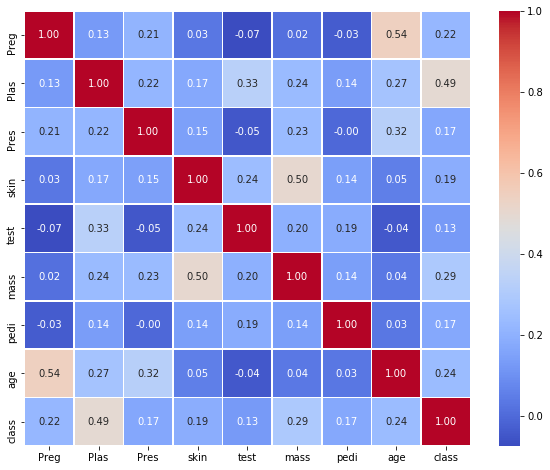

In [152]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data=diabetes_df.corr(), cmap='coolwarm', annot=True, fmt = ".2f", linewidths=.5, ax=axes) 
plt.show()

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [181]:
y=diabetes_df['class']
X = diabetes_df.drop('class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2) # Split into 70, 30 train test

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [183]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [186]:
dt_model.score(X_train, y_train)

0.7951582867783985

In [187]:
dt_model.score(X_test, y_test)

0.7705627705627706

In [188]:
test_pred = dt_model.predict(X_test)

In [189]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, test_pred))
'''As evident the prediction model has very low accuracy level in making the class predictions'''

[[125  30]
 [ 23  53]]


'As evident the prediction model has very low accuracy level in making the class predictions'

In [191]:
train_accuracy = []
test_accuracy = []
max_depth = 10
train_accuracy_plot = np.empty(10)
test_accuracy_plot = np.empty(10)
for i in range(1,3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=i)
    for j in range(1,5):
        dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=j)
        dt_model.fit(X_train , y_train)
        train_accuracy.append(dt_model.score(X_train,y_train))
        test_accuracy.append(dt_model.score(X_test, y_test))
        #Compute accuracy on the training set
        train_accuracy_plot[j] = np.mean(train_accuracy)
        print('For random state ', i)
        print('For best depth', j)
        print('Train accuracy ', dt_model.score(X_train,y_train) )
        #Compute accuracy on the testing set
        test_accuracy_plot[j] = np.mean(test_accuracy)
        print('Test accuracy ', dt_model.score(X_test,y_test) )

For random state  1
For best depth 1
Train accuracy  0.7243947858472998
Test accuracy  0.7619047619047619
For random state  1
For best depth 2
Train accuracy  0.7635009310986964
Test accuracy  0.7705627705627706
For random state  1
For best depth 3
Train accuracy  0.7635009310986964
Test accuracy  0.7705627705627706
For random state  1
For best depth 4
Train accuracy  0.7858472998137802
Test accuracy  0.7878787878787878
For random state  2
For best depth 1
Train accuracy  0.7337057728119181
Test accuracy  0.7402597402597403
For random state  2
For best depth 2
Train accuracy  0.7337057728119181
Test accuracy  0.7402597402597403
For random state  2
For best depth 3
Train accuracy  0.7690875232774674
Test accuracy  0.7619047619047619
For random state  2
For best depth 4
Train accuracy  0.7951582867783985
Test accuracy  0.7705627705627706


Print the feature importance of the decision model - Optional